**Ejercicio en clase - Transformaciones ETL para E-Commerce**

**Estudiante:** Juan Diego Díaz Guzmán

**Programa:** Maestría en Inteligencia Artificial y Ciencia de Datos

**Asignatura:** ETL

Universidad Autonomá de Occidente


**Contexto**

El ejercicio se centra en aplicar técnicas de Extract-Transform-Load (ETL) a un conjunto de datos de comercio electrónico. El dataset "MLA_100k.jsonlines" contiene información detallada sobre aproximadamente 100,000 productos de una plataforma de e-commerce (MercadoLibre Argentina), incluyendo características como títulos, precios, condiciones (nuevo/usado), categorías, tipos de envío, entre otros.

**Objetivo**

El objetivo principal es preparar un conjunto de datos limpio y estructurado que pueda ser utilizado para entrenar un modelo de aprendizaje automático que prediga si un producto está en condición "nuevo" o "usado". Esto tiene en cuenta lo siguiente:


1. Cargar y explorar los datos originales.
2. Realizar un análisis exploratorio detallado.
3. Limpiar y preprocesar los datos.
4. Crear nuevas características relevantes.
5. Preparar el dataset final para modelado.

**Metodología Aplicada**

**1. Carga y Exploración Inicial**

Se cargo el archivo "MLA_100k.jsonlines" desde la carpeta de datos, extrayengo las características más relevantes de cada producto para formar un dataframe estructurado. Este paso incluyó la identificación de los tipos de datos, la verificación de valores faltantes y el análisis de la distribución de la variable objetivo.

**2. Análisis exploratorio de Datos**

Se realizó un análisis exploratorio exhaustivo utilizando:

1. Visualizaciones de la distribuación de productos nuevos y usados.
2. Análisis de precios según la condición del producto.
3. Exploración de categorias y tipos de listado.
4. Análisis de características binarias como envío gratuito.
5. Estudio de correlaciones entre variables númericas.
6. Análisis de componentes temporales.(fechas de creación)

**3. Limpieza y Porcesamiento**

Se realizaron varias tareas de limpieza:

1. Manejo de valores nulos en columnas númericas y categoricas.
2. Conversión de tipos de datos.
3. Normalización de formatos.
4. Tratamiento de valores atípicos.

**4. Ingeniería de Características**

Se hizo la creación de nuevas variables predictivas:

- Características basadas en precio(descuentos, rangos de precio)
- Características extraídas del título como: longitud, número de palabras, menciones de "nuevo" o "usado"
- Indicadores de popularidad basado en ventas.
- Características temporales a partir de fechas.
- Agrupación de categorías poco frecuentes.
- Codificación one-hot para variables categóricas

**5. Preparación del Dataset Final**

Se generó un conjunto de datos final simplificando columnas que no son relevantes(identificadores, textos largos), dejando solo las características más predictivas para el modelo. El resultado se guardó en dos versiones: 

- Dataset completo con todas las características mencionadas.
- Dataset reducido solamente con las características más importantes.

**Importar Librerías**

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime
import re
import warnings
import os

#Imprimir directorio del trabajo actual
print(os.getcwd())  
%matplotlib inline

print("Librerías importadas de forma exitosa")

C:\Users\juant\OneDrive\Documentos\UAO\MAESTRÍA\PRIMER SEMESTRE\ETL\TRABAJOS EN CLASE\TALLER CLASE 06032025\mi_taller_etl\notebooks
Librerías importadas de forma exitosa


**Configuración de la visualización**

In [5]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

**Cargar Archivo en la Ruta Correcta**

In [6]:
file_path = os.path.join('..', 'data', 'MLA_100k.jsonlines')

**Cargue de Muestra**

In [7]:
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        try:
            data.append(json.loads(line))
            if i >= 10000:  # Limitamos a 10,000 registros para el análisis
                break
        except json.JSONDecodeError:
            continue

print(f"Se cargaron {len(data)} registros del archivo.")


Se cargaron 10001 registros del archivo.


**Extraer caracteristicas relevantes**

In [8]:
def extract_features(item):
    features = {
        'id': item.get('id', None),
        'title': item.get('title', None),
        'condition': item.get('condition', None),
        'price': item.get('price', None),
        'original_price': item.get('original_price', None),
        'currency_id': item.get('currency_id', None),
        'category_id': item.get('category_id', None),
        'listing_type_id': item.get('listing_type_id', None),
        'warranty': item.get('warranty', None),
        'shipping_free': item.get('shipping', {}).get('free_shipping', False),
        'shipping_mode': item.get('shipping', {}).get('mode', None),
        'accepts_mercadopago': item.get('accepts_mercadopago', None),
        'sold_quantity': item.get('sold_quantity', 0),
        'available_quantity': item.get('available_quantity', 0),
        'date_created': item.get('date_created', None),
        'last_updated': item.get('last_updated', None),
        'status': item.get('status', None),
        'seller_id': item.get('seller_id', None),
        'pictures_count': len(item.get('pictures', [])),
        'variations_count': len(item.get('variations', []))
    }
    return features

**Crear DataFrame**

In [9]:
df = pd.DataFrame([extract_features(item) for item in data])

**Información Básica**

In [10]:
print("Dimensiones del dataframe:", df.shape)
print("n\Información del Dataframe:")
df.info()

Dimensiones del dataframe: (10001, 20)
n\Información del Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10001 non-null  object 
 1   title                10001 non-null  object 
 2   condition            10001 non-null  object 
 3   price                10001 non-null  float64
 4   original_price       12 non-null     float64
 5   currency_id          10001 non-null  object 
 6   category_id          10001 non-null  object 
 7   listing_type_id      10001 non-null  object 
 8   warranty             4023 non-null   object 
 9   shipping_free        10001 non-null  bool   
 10  shipping_mode        10001 non-null  object 
 11  accepts_mercadopago  10001 non-null  bool   
 12  sold_quantity        10001 non-null  int64  
 13  available_quantity   10001 non-null  int64  
 14  date_created      

**Estadísticas Descriptivas**

In [11]:
print("n\Estadísticas Descriptivas")
print(df.describe())

n\Estadísticas Descriptivas
              price  original_price  sold_quantity  available_quantity  \
count  1.000100e+04       12.000000   10001.000000        10001.000000   
mean   6.779325e+03     1408.158333       2.975602           37.140986   
std    1.326366e+05     2920.313764      64.605967          446.695669   
min    1.000000e+00      150.000000       0.000000            1.000000   
25%    9.000000e+01      349.250000       0.000000            1.000000   
50%    2.500000e+02      544.000000       0.000000            1.000000   
75%    7.900000e+02      837.250000       0.000000            2.000000   
max    1.111111e+07    10610.000000    6065.000000         9999.000000   

          seller_id  pictures_count  variations_count  
count  1.000100e+04    10001.000000      10001.000000  
mean   8.433803e+07        2.885311          0.180582  
std    5.493548e+07        2.011454          1.004284  
min    3.909200e+04        0.000000          0.000000  
25%    3.967817e+07      

**Análisis exploratorio de Visualizaciones**


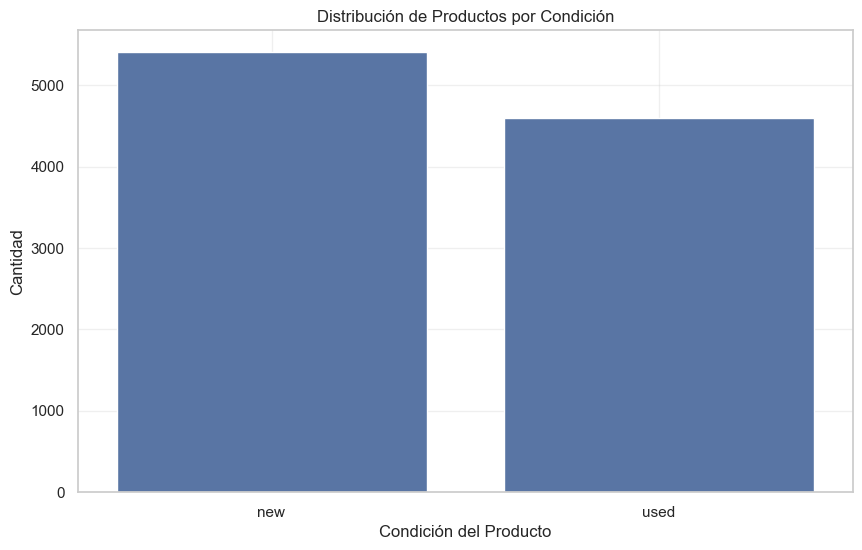

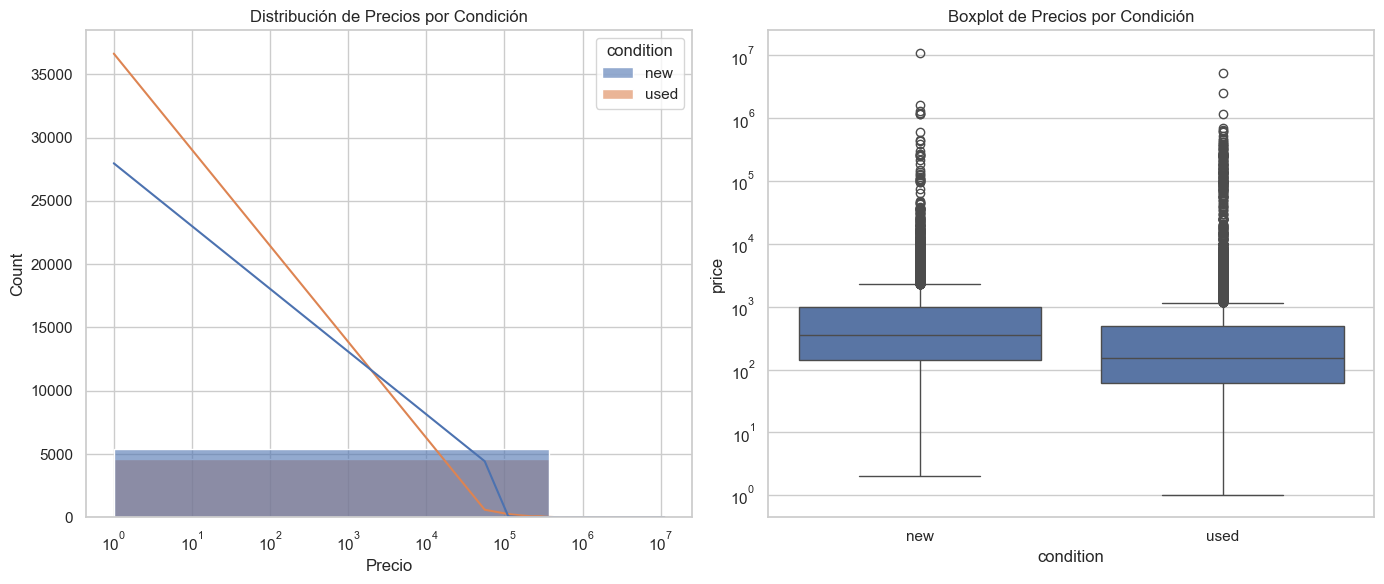

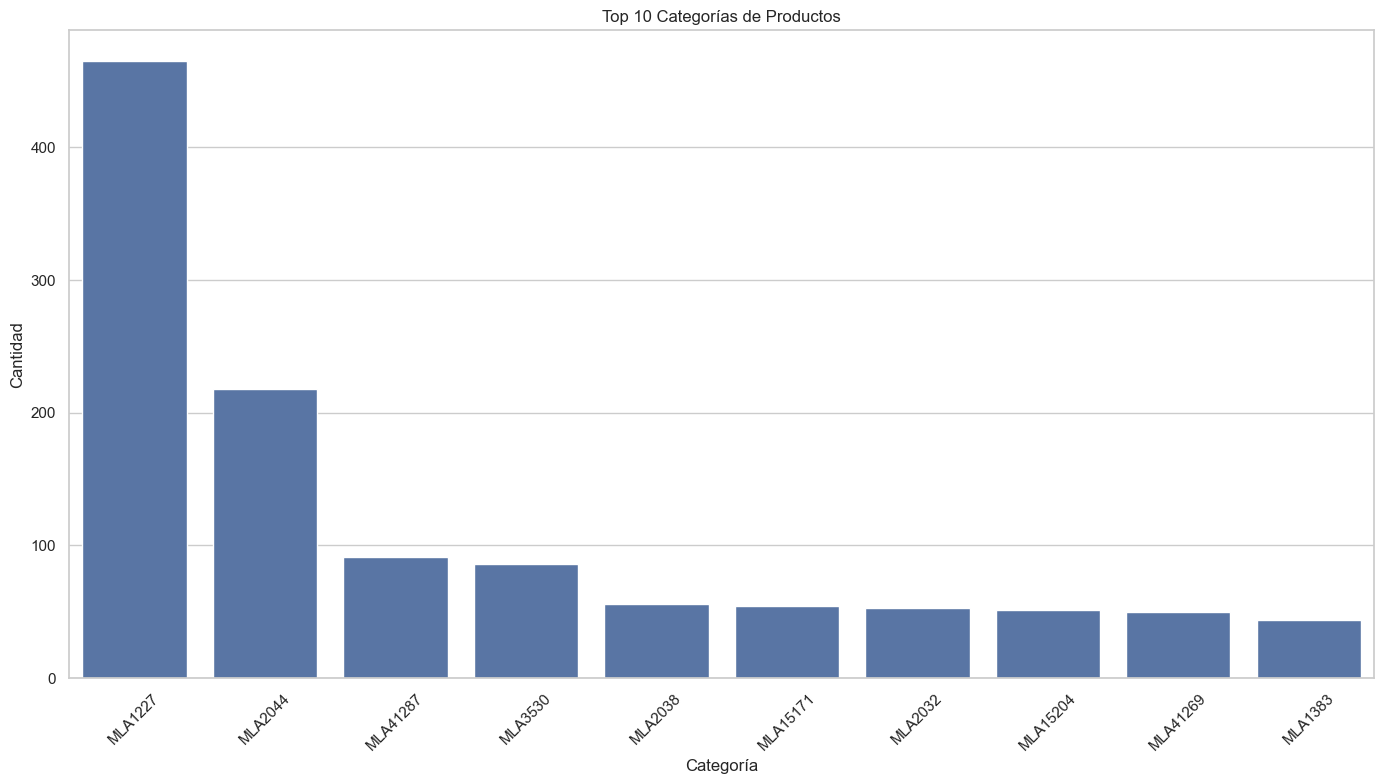

<Figure size 1400x800 with 0 Axes>

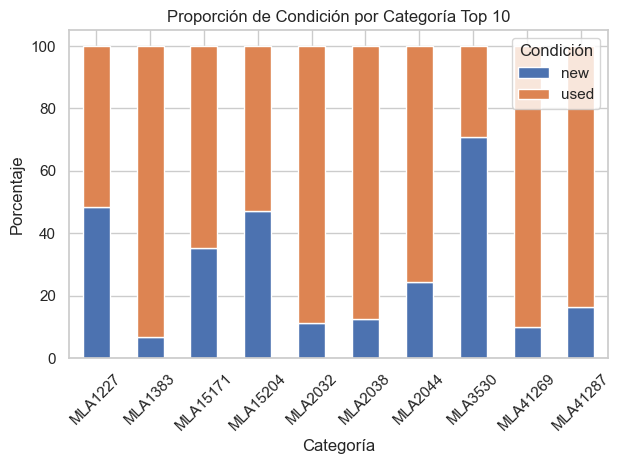

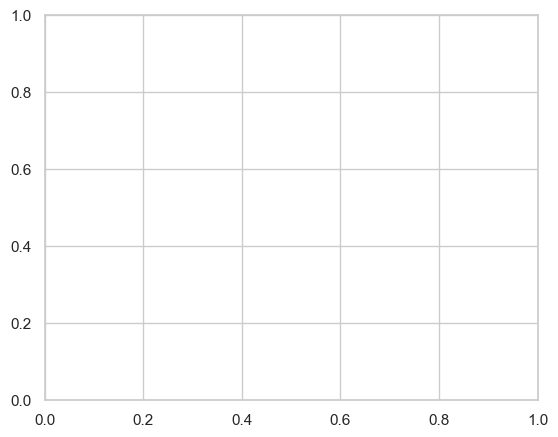

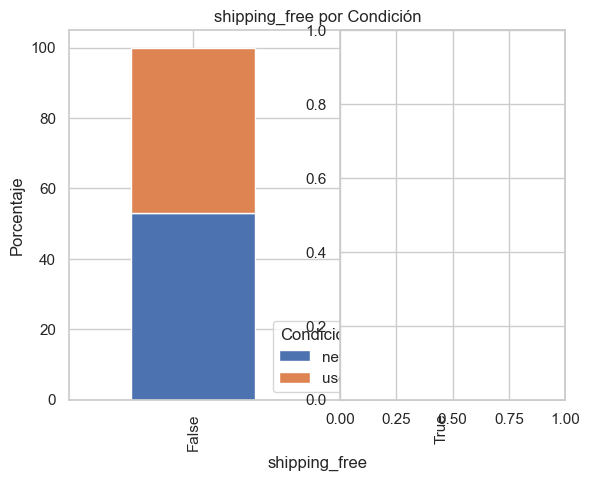

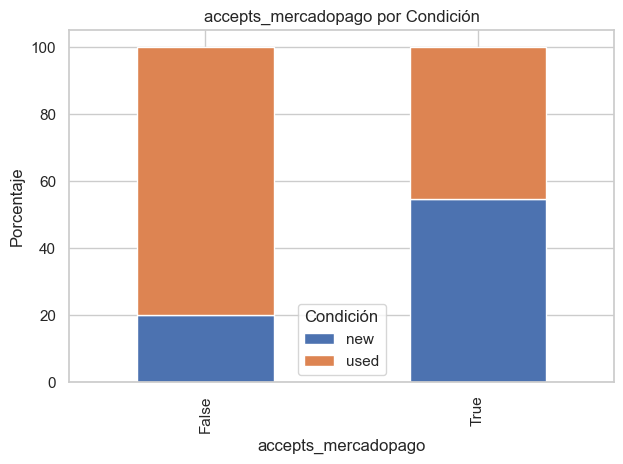

In [12]:
# Distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Distribución de Productos por Condición')
plt.xlabel('Condición del Producto')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.show()

# Análisis de precios por condición
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='price', hue='condition', bins=30, kde=True, alpha=0.6)
plt.title('Distribución de Precios por Condición')
plt.xlabel('Precio')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.boxplot(x='condition', y='price', data=df)
plt.title('Boxplot de Precios por Condición')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Top 10 categorías
plt.figure(figsize=(14, 8))
top_categories = df['category_id'].value_counts().head(10)
ax = sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Categorías de Productos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()

# Proporción de condición por cada categoría top
plt.figure(figsize=(14, 8))
top_cats = top_categories.index.tolist()
filtered_df = df[df['category_id'].isin(top_cats)]
condition_by_category = pd.crosstab(filtered_df['category_id'], filtered_df['condition'], normalize='index') * 100
condition_by_category.plot(kind='bar', stacked=True)
plt.title('Proporción de Condición por Categoría Top 10')
plt.xlabel('Categoría')
plt.ylabel('Porcentaje')
plt.legend(title='Condición')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de características binarias
binary_features = ['shipping_free', 'accepts_mercadopago']
plt.figure(figsize=(14, 5))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(1, 2, i)
    cross_tab = pd.crosstab(df[feature], df['condition'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{feature} por Condición')
    plt.xlabel(feature)
    plt.ylabel('Porcentaje')
    plt.legend(title='Condición')
plt.tight_layout()
plt.show()

**Limpieza y Transformaciones**

In [13]:
df_clean = df.copy()

#Manejo de Valores Nulos
print("\nValores nulos por columna:")
print(df_clean.isnull().sum())

#Mapear valores faltantes en columnas númericas
numeric_cols = ['price', 'original_price','sold_quantity','available_quantity'
                ,'pictures_count','variations_count']

for col in numeric_cols:
    df_clean[col].fillna(0, inplace=True)

# Mapear valores faltantes en columnas categóricas
categorical_cols = ['currency_id', 'category_id', 'listing_type_id', 
                    'shipping_mode', 'status', 'warranty']

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col].fillna('uknown', inplace=True)

#Verificación de valores nulos
print("\n Valores nulos después del mapeo:")
print(df_clean.isnull().sum())




Valores nulos por columna:
id                        0
title                     0
condition                 0
price                     0
original_price         9989
currency_id               0
category_id               0
listing_type_id           0
warranty               5978
shipping_free             0
shipping_mode             0
accepts_mercadopago       0
sold_quantity             0
available_quantity        0
date_created              0
last_updated              0
status                    0
seller_id                 0
pictures_count            0
variations_count          0
dtype: int64

 Valores nulos después del mapeo:
id                     0
title                  0
condition              0
price                  0
original_price         0
currency_id            0
category_id            0
listing_type_id        0
warranty               0
shipping_free          0
shipping_mode          0
accepts_mercadopago    0
sold_quantity          0
available_quantity     0
date_created  

**Ingeniería de Características**

In [14]:
# 1. Características basadas en precio
if 'original_price' in df_clean.columns and 'price' in df_clean.columns:
    # Indicador de descuento
    df_clean['has_discount'] = df_clean.apply(
        lambda row: row['original_price'] > row['price'] if pd.notnull(row['original_price']) else False, 
        axis=1
    )
    
    # Monto del descuento
    df_clean['discount_amount'] = df_clean.apply(
        lambda row: max(0, row['original_price'] - row['price']) if pd.notnull(row['original_price']) else 0, 
        axis=1
    )
    
    # Porcentaje de descuento
    df_clean['discount_percentage'] = df_clean.apply(
        lambda row: (row['discount_amount'] / row['original_price'] * 100) if pd.notnull(row['original_price']) 
        and row['original_price'] > 0 else 0, 
        axis=1
    )
    
    # Rango de precio
    price_bins = [0, 100, 500, 1000, 5000, float('inf')]
    price_labels = ['muy_bajo', 'bajo', 'medio', 'alto', 'premium']
    df_clean['price_range'] = pd.cut(df_clean['price'], bins=price_bins, labels=price_labels)

# 2. Características del título
if 'title' in df_clean.columns:
    # Longitud del título
    df_clean['title_length'] = df_clean['title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
    
    # Cantidad de palabras
    df_clean['title_word_count'] = df_clean['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    # Si menciona "nuevo" o "usado" en el título
    def contains_keyword(text, keywords):
        if pd.isnull(text):
            return 0
        text = text.lower()
        for keyword in keywords:
            if keyword in text:
                return 1
        return 0
    
    new_keywords = ['nuevo', 'new', 'nueva', 'sin uso', 'a estrenar']
    used_keywords = ['usado', 'used', 'usada', 'segunda mano', 'seminuevo']
    
    df_clean['title_mentions_new'] = df_clean['title'].apply(lambda x: contains_keyword(x, new_keywords))
    df_clean['title_mentions_used'] = df_clean['title'].apply(lambda x: contains_keyword(x, used_keywords))

# 3. Características de popularidad
df_clean['is_popular'] = (df_clean['sold_quantity'] > 0) & (df_clean['available_quantity'] > 0)
df_clean['sales_ratio'] = df_clean.apply(
    lambda row: row['sold_quantity'] / (row['available_quantity'] + row['sold_quantity']) 
    if (row['available_quantity'] + row['sold_quantity']) > 0 else 0,
    axis=1
)

# 4. Características temporales (si tenemos fechas)
if 'date_created' in df_clean.columns:
    # Convertir a datetime
    df_clean['date_created'] = pd.to_datetime(df_clean['date_created'], errors='coerce')
    # Extraer año y mes
    df_clean['creation_year'] = df_clean['date_created'].dt.year
    df_clean['creation_month'] = df_clean['date_created'].dt.month

# 5. Transformación de la variable objetivo
df_clean['condition_code'] = df_clean['condition'].map({'new': 1, 'used': 0})

# 6. Codificación one-hot para variables categóricas
# Seleccionamos columnas categóricas para codificar
categorical_features = ['category_id', 'listing_type_id', 'shipping_mode', 'price_range']
categorical_features = [col for col in categorical_features if col in df_clean.columns]

# Agrupar categorías poco frecuentes
# Primero convertimos la columna a tipo string (object)
for col in categorical_features:
    df_clean[col] = df_clean[col].astype(str)
    
    # Ahora agrupamos categorías poco frecuentes
    value_counts = df_clean[col].value_counts()
    mask = df_clean[col].isin(value_counts[value_counts < 10].index)
    df_clean.loc[mask, col] = 'other'

# Codificación one-hot
df_encoded = pd.get_dummies(df_clean, columns=categorical_features, drop_first=False)

# Verificar dimensiones después de codificación
print(f"\nDimensiones originales: {df_clean.shape}")
print(f"Dimensiones después de codificación: {df_encoded.shape}")


Dimensiones originales: (10001, 33)
Dimensiones después de codificación: (10001, 185)


**Preparación final del Dataset**

In [15]:
# Selección de características para el modelo final
cols_to_drop = ['id', 'title', 'condition', 'date_created', 'last_updated']
cols_to_drop = [col for col in cols_to_drop if col in df_encoded.columns]

df_final = df_encoded.drop(columns=cols_to_drop)

# Verificar el conjunto de datos final
print(f"\nDimensiones finales: {df_final.shape}")
print("\nColumnas incluidas en el dataset final:")
print(df_final.columns.tolist())

# Guardar el dataset limpio
output_dir = os.path.join('..', 'data')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

df_final.to_csv(os.path.join(output_dir, 'ecommerce_clean.csv'), index=False)
print("\nDataset limpio guardado exitosamente")

# Guardar información reducida de caracteristicas relevanetes
important_features = [
    'price', 'original_price', 'discount_percentage', 'has_discount',
    'title_length', 'title_word_count', 'title_mentions_new', 'title_mentions_used',
    'pictures_count', 'variations_count', 'shipping_free', 'is_popular', 
    'sales_ratio', 'condition_code'
]

important_features = [col for col in important_features if col in df_final.columns]
df_reduced = df_final[important_features]
df_reduced.to_csv(os.path.join(output_dir, 'ecommerce_clean_reduced.csv'), index=False)
print("Dataset reducido guardado exitosamente")


Dimensiones finales: (10001, 180)

Columnas incluidas en el dataset final:
['price', 'original_price', 'currency_id', 'warranty', 'shipping_free', 'accepts_mercadopago', 'sold_quantity', 'available_quantity', 'status', 'seller_id', 'pictures_count', 'variations_count', 'has_discount', 'discount_amount', 'discount_percentage', 'title_length', 'title_word_count', 'title_mentions_new', 'title_mentions_used', 'is_popular', 'sales_ratio', 'creation_year', 'creation_month', 'condition_code', 'category_id_MLA10127', 'category_id_MLA1070', 'category_id_MLA109383', 'category_id_MLA11456', 'category_id_MLA119287', 'category_id_MLA119326', 'category_id_MLA119352', 'category_id_MLA1207', 'category_id_MLA12205', 'category_id_MLA1227', 'category_id_MLA12812', 'category_id_MLA1383', 'category_id_MLA1458', 'category_id_MLA1468', 'category_id_MLA1474', 'category_id_MLA1495', 'category_id_MLA15157', 'category_id_MLA15163', 'category_id_MLA15171', 'category_id_MLA15172', 'category_id_MLA15191', 'categor

**Resultados y Conclusiones**

El análisis exploratorio reveló patrones signficativos en los datos, como:

- Diferencias claras en la distribución de precios entre productos nuevos y usados.
- Ciertas categorías de productos con mayor proporción de artículos usados.
- Correlaciones importantes entre el precio, descuentos y la condición.
- Indicadores textuales en los titulso que predicen la condición.